In [2]:
graphics_toolkit('qt')

In [3]:
addpath('../libs/');

# K-means

## Fin closest centroids

In [4]:
load('../../data/ex7data2.mat');
whos

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name        Size                     Bytes  Class
  ====   ====        ====                     =====  ===== 
         X         300x2                       4800  double
         ans         1x2                          2  char

Total is 602 elements using 4802 bytes



In [5]:
K = 3;
initial_centroids = [3 3; 6 2; 8 5];

In [6]:
idx = findClosestCentroids(X, initial_centroids);

In [7]:
fprintf('Closest centroids for the first 3 examples: \n')
fprintf(' %d', idx(1:3));
fprintf('\n(the closest centroids should be 1, 3, 2 respectively)\n');

Closest centroids for the first 3 examples: 
 1 3 2
(the closest centroids should be 1, 3, 2 respectively)


## compute means

In [8]:
centroids = computeCentroids(X, idx, K);

In [9]:
fprintf('Centroids computed after initial finding of closest centroids: \n')
fprintf(' %f %f \n' , centroids');
fprintf('\n(the centroids should be\n');
fprintf('   [ 2.428301 3.157924 ]\n');
fprintf('   [ 5.813503 2.633656 ]\n');
fprintf('   [ 7.119387 3.616684 ]\n\n');

Centroids computed after initial finding of closest centroids: 
 2.428301 3.157924 
 5.813503 2.633656 
 7.119387 3.616684 

(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]



## K-means clustering

In [10]:
load('../../data/ex7data2.mat');

In [11]:
K = 3;
max_iters = 10
initial_centroids = [3 3; 6 2; 8 5];

max_iters = 10


K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


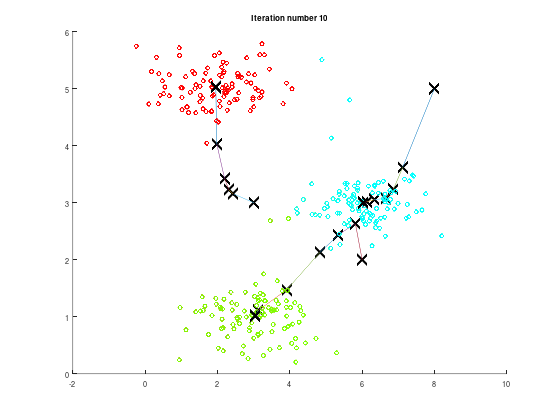

In [12]:
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, true);

# K-means on pixels

In [13]:
A = double(imread('../../data/bird_small.png'));
A = A / 255; % normalize
img_size = size(A);

In [14]:
X = reshape(A, img_size(1) * img_size(2), 3);

In [62]:
K = 16;
max_iters = 20;

In [63]:
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

K-Means iteration 1/20...
K-Means iteration 2/20...
K-Means iteration 3/20...
K-Means iteration 4/20...
K-Means iteration 5/20...
K-Means iteration 6/20...
K-Means iteration 7/20...
K-Means iteration 8/20...
K-Means iteration 9/20...
K-Means iteration 10/20...
K-Means iteration 11/20...
K-Means iteration 12/20...
K-Means iteration 13/20...
K-Means iteration 14/20...
K-Means iteration 15/20...
K-Means iteration 16/20...
K-Means iteration 17/20...
K-Means iteration 18/20...
K-Means iteration 19/20...
K-Means iteration 20/20...


## Image Compression

In [64]:
idx = findClosestCentroids(X, centroids);

In [66]:
X_recovered = centroids(idx, :);
X_recovered = reshape(X_recovered, img_size(1), img_size(2), 3);

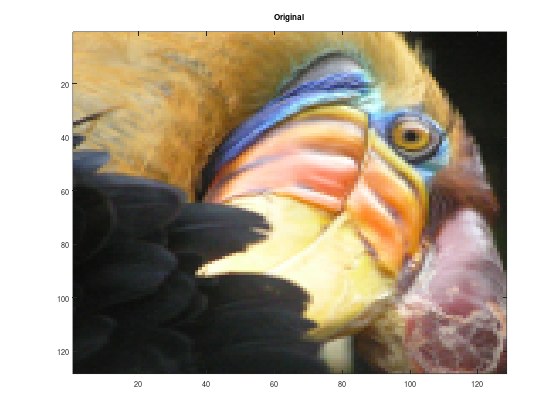

In [67]:
% Display the original image 
imagesc(A); 
title('Original');


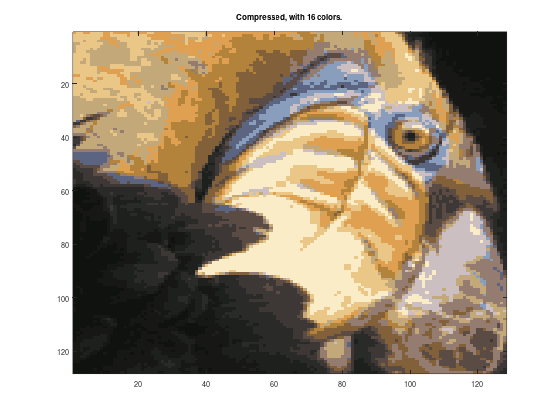

In [68]:
% Display compressed image side by side
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));